# Numerical Data

Numerical data consists of *discrete* and *continuous* number values. Discrete data values can be integers or rational numbers, such as the number of marbles in a jar or shoe sizes. Continuous data values can be rational and irrational numbers, such as height recordings or temperature collections. In this section, we will practice making histograms, scatter plots, and line graphs to represent numerical data.

Let's load the necessary libraries and read in the data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

NorthAmerica_Military_USD_PercentGDP_Combined_csv = '''\
Year,CAN-PercentGDP,MEX-PercentGDP,USA-PercentGDP,CAN-USD,MEX-USD,USA-USD
1960,4.18525654,0.673508659,8.993124587,1.702442711,0.084,47.34655267
1961,4.128312243,0.651780326,9.1560315,1.677820881,0.0864,49.87977061
1962,3.999216389,0.689655172,9.331672945,1.671313753,0.0992,54.65094261
1963,3.620650112,0.718685832,8.831891186,1.610091701,0.112,54.56121578
1964,3.402062837,0.677506775,8.051281106,1.657457283,0.12,53.43232706
1965,2.930260659,0.591269841,7.587247177,1.57470454,0.1192,54.56179126
1966,2.683282422,0.576379066,8.435300286,1.614422827,0.1304,66.44275153
1967,2.74792677,0.545217107,9.417795933,1.775500366,0.1336,78.39844224
1968,2.54364188,0.548510764,9.268454275,1.797265817,0.1488,84.32903122
1969,2.27378467,0.600160043,8.633263795,1.770108751,0.18,84.99016543
1970,2.188979696,0.497411659,8.032743584,1.889157918,0.1768,83.407993
1971,2.131485639,0.48765558,6.943069609,2.077659711,0.1912,78.23797989
1972,2.011818438,0.536568089,6.519756924,2.233737031,0.2424,80.70807097
1973,1.832601818,0.544217687,5.893870591,2.363060955,0.3008,81.46979441
1974,1.783813085,0.565744137,5.954111197,2.809465529,0.4072,89.27892034
1975,1.863541853,0.57358422,5.622679096,3.18091549,0.5048,92.08092875
1976,1.765927978,0.598103574,5.191071429,3.581805735,0.531576968,94.71525108
1977,1.8057636,0.534256205,5.155617351,3.752174526,0.437692986,104.665219
1978,1.848887401,0.504834431,4.943087248,3.969158477,0.518287193,113.3820637
1979,1.711245918,0.505297474,4.951991535,4.084145738,0.679663588,126.8799271
1980,1.764448615,0.416107383,5.153537467,4.744402251,0.810422204,143.6883549
1981,1.709915638,0.513301014,5.646541256,5.141128191,1.284948561,176.5588753
1982,1.954343585,0.495419418,6.814057094,6.017321456,0.858130163,221.6735426
1983,2.081196249,0.522866314,6.32114426,6.947104072,0.778556797,223.427165
1984,2.117188855,0.65981906,6.23641653,7.349795764,1.155945373,245.1491683
1985,2.097376234,0.676313139,6.453219205,7.460563318,1.241863652,272.1632293
1986,2.109197118,0.634622463,6.626522658,7.78013674,0.817296612,295.5462238
1987,2.062576371,0.580341889,6.420274023,8.694447168,0.813391574,304.0866487
1988,1.986767119,0.536145374,6.071277702,9.897335684,0.981914646,309.6612693
1989,1.934614309,0.517255829,5.871206008,10.74713469,1.153375828,321.8665588
1990,1.958793742,0.433081035,5.605175294,11.41463185,1.210872502,325.129314
1991,1.895444339,0.435402301,4.883429398,11.3385033,1.459136041,299.3727791
1992,1.8616877,0.469454656,4.970466808,10.78880312,1.824550066,325.033736
1993,1.821753504,0.442785494,4.604350295,10.26882262,2.122980338,316.7194437
1994,1.696680257,0.518830327,4.215264675,9.57737764,2.635284079,308.084
1995,1.554090071,0.450891531,3.860245792,9.176903908,1.562615372,295.8530977
1996,1.403752581,0.476484778,3.554982206,8.615884471,1.882873103,287.9606687
1997,1.246243202,0.458095854,3.405562244,7.945140183,2.184061042,293.1678258
1998,1.256293902,0.450450487,3.201558499,7.748607984,2.263223453,290.9960551
1999,1.241703064,0.460988776,3.085676783,8.21077854,2.652912012,298.0948913
2000,1.11808088,0.44604782,3.112242147,8.299385231,3.031454509,320.0863242
2001,1.137368973,0.442657004,3.123809803,8.375571425,3.229469276,331.8056106
2002,1.120852292,0.421606002,3.447618099,8.495399281,3.172268734,378.4631388
2003,1.115878799,0.405916547,3.827161045,9.958245602,2.960496802,440.5320696
2004,1.107966027,0.364898723,4.016312736,11.33648983,2.854385965,492.9993762
2005,1.110669655,0.355958931,4.090034876,12.98813296,3.123454978,533.203
2006,1.125832408,0.311171936,4.041627237,14.8098928,3.035131019,558.335
2007,1.188901783,0.401163918,4.079655081,17.41713993,4.223037646,589.586
2008,1.248621382,0.390513227,4.463827356,19.3420584,4.334654124,656.756
2009,1.377555631,0.501556275,4.88559968,18.93622605,4.514233914,705.917
2010,1.194338338,0.452734493,4.922641677,19.31568883,4.789031339,738.005
2011,1.193291895,0.465777803,4.840173995,21.39372086,5.498458542,752.288
2012,1.118404598,0.475987281,4.477401219,20.45210711,5.717035575,725.205
2013,1.0023672,0.507919455,4.046678879,18.51573121,6.473144378,679.229
2014,0.989925299,0.513829957,3.69589465,17.85364048,6.758693845,647.789
2015,1.152709374,0.466676122,3.477845166,17.93764189,5.468837812,633.829639
2016,1.164161567,0.495064414,3.418942337,17.78277554,5.33687574,639.856443
2017,1.351602232,0.436510296,3.313381294,22.26969632,5.062076646,646.752927
2018,1.324681094,0.477517407,3.316248808,22.72932758,5.839521271,682.4914
2019,1.27894142,0.52348249,3.427080181,22.20440844,6.650808254,734.3441
2020,1.415055841,0.573651659,3.741160091,22.75484713,6.116376582,778.2322
'''

from io import StringIO

NorthAmerica_Military_USD_PercentGDP_Combined_file = StringIO(NorthAmerica_Military_USD_PercentGDP_Combined_csv)

military = pd.read_csv(NorthAmerica_Military_USD_PercentGDP_Combined_file, index_col='Year')

## Scatter plots

Scatter plots can be used to visualize the relationship between two numerical variables. They are most commonly used to visualize two continous numerical variables against each other (in other words, the data takes on values that are between whole number integers). These plots can also be used when data takes on a large number of different discrete integers. We will use a scatter plot to visualize the percentage of the GDP (<u>G</u>ross <u>D</u>omestic <u>P</u>roduct) of Mexico spent on the military versus the absolute dollar amount (in USD) over 1960-2020.

We'll simply extract the columns for this data and assign them to `mex_gdp` and `mex_usd`, respectively. Then, we can plot this data using the `plt.scatter()` function and use `plt.show()` to display the plot.

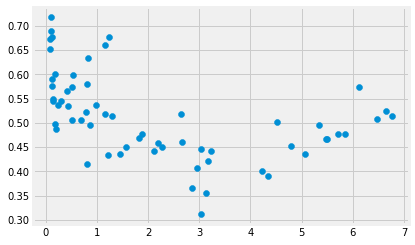

In [3]:
mex_gdp = military[['MEX-USD']]

mex_usd = military[['MEX-PercentGDP']]

plt.scatter(mex_gdp, mex_usd)  # mex_gdp on the x-axis, mex_usd on the y-axis

plt.show()

Looking at this scatter plot out of context, it would be hard to understand what the data means. Let's add some important details to make it clear.

Firstly, we can add a title using the `plt.title()` function. This function accepts a string argument to be used as the text for the title. It also has an optional `pad` parameter, which dictates the space between the title and the plotting area.

We can also use `plt.ylabel()` and `plt.xlabel()` to label the y- and x-axes, respectively.

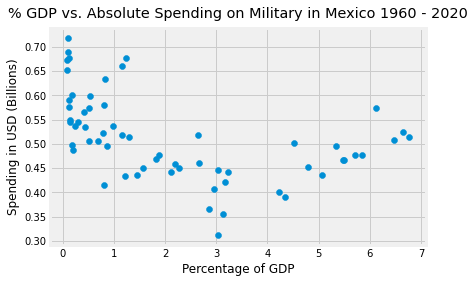

In [3]:
plt.scatter(mex_gdp, mex_usd)

plt.title("% GDP vs. Absolute Spending on Military in Mexico 1960 - 2020", pad=10)

plt.ylabel('Spending in USD (Billions)')
plt.xlabel('Percentage of GDP')

plt.show()

Now we have a better understanding of the data. 

In addition to this information, we can add a color scheme that will color each data point based on the year of collection. This adds another dimension of analysis, using year as a feature; the context of the spending relationship can be examined over time.

The `plt.scatter()` function minimally needs two arguments - *x* and *y* - which are array-like variables. Other optional arguments include `c`, which determines how to color the data points; `alpha`, which sets the opacity of the data points; and `cmap` which sets the Colormap used to color the data points. 

The `plt.colorbar()` function displays a scale of the Colormap based on the feature used to color the data, which in our case is the year of collection.

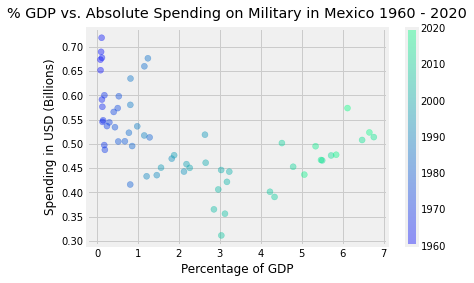

In [4]:
mex_years = mex_gdp.index

plt.scatter(mex_gdp, mex_usd, c=mex_years, alpha=0.4, cmap='winter')

plt.title("% GDP vs. Absolute Spending on Military in Mexico 1960 - 2020", pad=10)

plt.ylabel('Spending in USD (Billions)')
plt.xlabel('Percentage of GDP')

plt.colorbar()

plt.show()

We used the years of the dataset (which we defined as the index earlier in this chapter) as our `c` argument to color the data points based on the year of collection. We used the *winter* Colormap as our `cmap` argument, but many other Colormaps are available for your choosing. A list of other possible Colormaps to explore can be found <a target="_blank" href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">here</a>.

## Line graphs

Next, we'll examine the use of a line graph as another visualization tool for numerical data. Line graphs are used to visualize sequential numerical data. By using line graphs, we can easily see trends within data over time.

Let's examine the spending (in USD) on the military in Canada in the 21st century (2000-2020). We can extract this data and call it `can_usd`.

In Python, visualizations can be made using dataframe methods or by directly calling functions from the `pyplot` library in `matplotlib`. We can quickly create a line graph using `plot()` method on the `can_usd` dataframe:

In [5]:
can_usd = military[['CAN-USD']].loc[2000:2020]

can_usd.head()

,CAN-USD
Year,
2000,8.299385
2001,8.375571
2002,8.495399
2003,9.958246
2004,11.336490


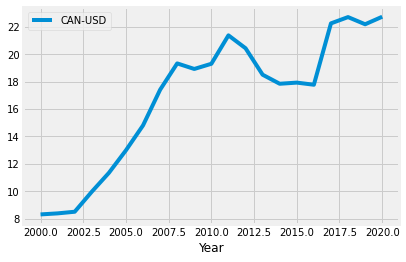

In [6]:
can_usd.plot()
plt.show()

The same plot can be made using the `pyplot` function `plt.plot()`:

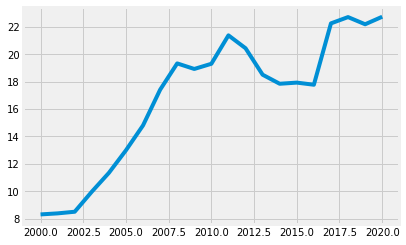

In [7]:
plt.plot(can_usd)
plt.show()

Notice how the `plot()` method automatically uses the `Year` column to label the x-axis, while the `plt.plot()` function does not. This can simply be remedied using the `plt.xlabel()` function. We can add a y-label as well using `plt.ylabel()`.

Also notice the increments of the x-axis for both plots. To change these increments to integers, we can create an array consisting of years of the desired increments and then use it as an argument for the `plt.xticks()` function:

In [8]:
years = np.arange(2000, 2021, 5)

years

array([2000, 2005, 2010, 2015, 2020])

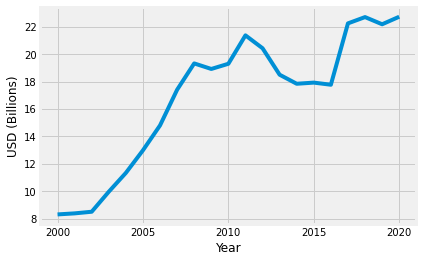

In [9]:
plt.plot(can_usd)
plt.xlabel('Year')
plt.ylabel('USD (Billions)')
plt.xticks(years)
plt.show()

We can see from the graph that Canada's spending on the military has increased overall since 2000. The country had a period of time (around 2011 to 2017) where military spending was decreasing consistently.

### Visualizing multiple trends using line graphs

We can view trends for multiple variables at once. Let's add the data for Mexico as well to see the country's spending in the 21<sup>st</sup> century.

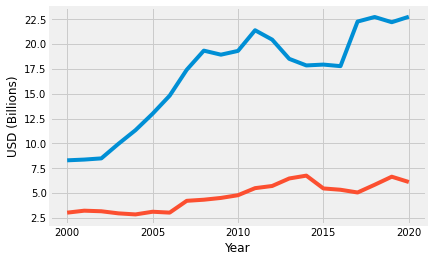

In [10]:
mex_usd = military[['MEX-USD']].loc[2000:2020]

plt.plot(can_usd)
plt.plot(mex_usd)

plt.xlabel('Year')
plt.ylabel('USD (Billions)')
plt.xticks(years)

plt.show()

We can now see that the military spending for both Mexico and Canada is vastly different. However, just looking at this graph out of context, we wouldn't be able to tell which line corresponds to which country. Let's add some descriptive details, such as a legend and a title:

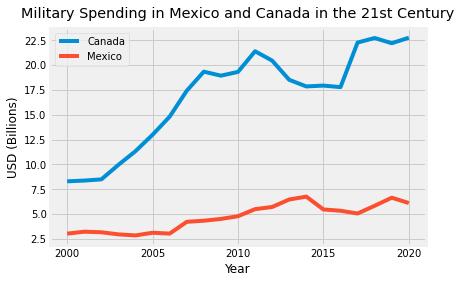

In [11]:
plt.plot(can_usd, label='Canada')
plt.plot(mex_usd, label='Mexico')

plt.xlabel('Year')
plt.ylabel('USD (Billions)')
plt.xticks(years)

plt.legend(loc="best")       # Adds a legend to the figure
plt.title("Military Spending in Mexico and Canada in the 21st Century", pad=10)

plt.show()

We can see that the overall trend of military spending in Mexico also increased from 2000 to 2020. However, this increase was a lot less drastic than observed in Canada. Mexico's military spending was a steady rise from about \$3 billion to \$6 billion over the course of 20 years, while Canada's spending rose from \$8 billion to about \$23 billion over the same period of time.

Let's add data from the United States to see the trends in all North American countries.

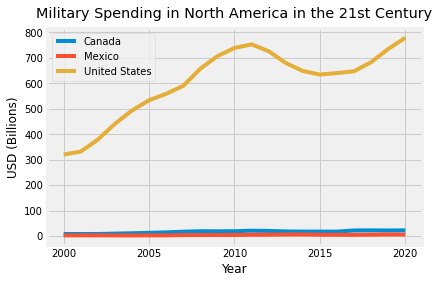

In [12]:
usa_usd = military[['USA-USD']].loc[2000:2020]

plt.plot(can_usd, label='Canada')
plt.plot(mex_usd, label='Mexico')
plt.plot(usa_usd, label='United States')

plt.xlabel('Year')
plt.ylabel('USD (Billions)')
plt.xticks(years)

plt.legend(loc="best")
plt.title("Military Spending in North America in the 21st Century", pad=10)

plt.show()

With the addition of the data from the United States, it's difficult to discern the data from Canada and Mexico. Because the spending on the military in the United States was a lot higher, plotting all three datasets on the same graph with the same axis does not allow us to clearly see trends in the other countries.

To address this, we can graph the data for each country separately with axis limits that are tailored to each country. If we graph this data side by side, we can see the trends in each country while acknowledging that the axis intervals for each country provides a numerical context for cross-comparisons.

To do this, we use the `plt.subplots()` function. This function creates a `figure` object and `axis` objects, which we will name `fig` and `ax`, respectively. More information on the workings of `plt.subplots()` is linked at the end of this section.

By using `plt.subplots()`, we can add data for Canada, Mexico and the United States to the same figure by specifying the data assigned to each `ax` object. Here, we will define three `ax` objects: `ax1`, `ax2`, and `ax3`. This will allow us to create <u>three</u> separate plotting areas, bounded by <u>three</u> different axes, that are contained within <u>one</u> figure.

Once the figure and axes are defined, we can create a title for the entire figure using `fig.suptitle()`. Using the `.plot()` method for each `ax` object, we can specify which data to plot in each axis. We can also specify other plotting features about each axis by using various methods on each axis object, such as the `set_title()`, `set_xlabel()`, `set_ylim()`, and `set_xticks()` methods:

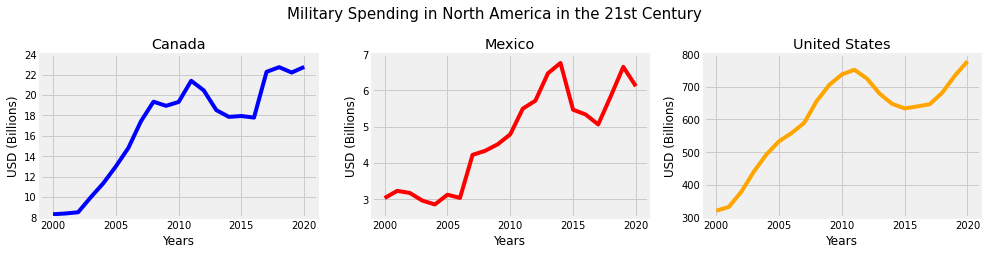

In [13]:
# Defines a figure object and three axis objects
# Sets the dimensions of the figure (1 x 3 axes)
# Sets the figure size (15in x 3in)
(fig, (ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 3))


# Sets title for entire figure
fig.suptitle('Military Spending in North America in the 21st Century', y=1.1, fontsize=15)


# Makes plots for each axis
ax1.plot(can_usd, color='blue')              # Plots Canada data to ax1 
ax1.set_title('Canada')                      # Sets title for ax1
ax1.set_ylim([8, 24])                        # Sets y-axis limits for ax1
ax1.set_xlabel('Years')                      # Sets x-axis labels for ax1
ax1.set_ylabel('USD (Billions)')             # Sets y-axis labels for ax1
ax1.set_xticks(years)                        # Sets x-ticks for ax1

ax2.plot(mex_usd, color='red')               # Plots Mexico data to ax2
ax2.set_title('Mexico')                      # Sets title for ax2
ax2.set_ylim([2.5, 7])                       # Sets y-axis limits for ax2
ax2.set_xlabel('Years')                      # Sets x-axis labels for ax2
ax2.set_ylabel('USD (Billions)')             # Sets y-axis labels for ax2
ax2.set_xticks(years)                        # Sets x-ticks for ax2

ax3.plot(usa_usd, color='orange')            # Plots U.S. data to ax3
ax3.set_title('United States')               # Sets title for ax3
ax3.set_ylim([300, 800])                     # Sets y-axis limits for ax3
ax3.set_xlabel('Years')                      # Sets x-axis labels for ax3
ax3.set_ylabel('USD (Billions)')             # Sets y-axis labels for ax3
ax3.set_xticks(years)                        # Sets x-ticks for ax3

plt.show()

Now that we've created separate subplots, we can see the trends for all three countries over the last 20 years. All three countries seem to have decreased spending around 2011 and 2018. By observing the difference in scale, we can also see that while the trends are similar, the magnitude of spending was very different between Canada, Mexico, and the United States.

## Histograms

Histograms are a great way to view a **distribution** of numerical data. A distribution of a dataset is a visual display of all the values within the dataset when plotted on a graph, showing the frequency of occurence of said values.


In histogram plots, a numerical component of data is divided into what are called **bins**. As data points are assigned to their respective bins, the total number of data points in each bin is quantified and plotted, visualizing a distribution of frequencies. In the upcoming exercise, we will explore how to visualize distributions of values in our dataset.


Let's examine military spending in the United States from 1960 to 2020. We can look at multiple ranges of dollar amounts spent on the military as our independent variable and organize them into bins. After, we can determine how many fiscal years fall into each of these bins and visualize the distribution.

First, we will need to extract the data pertaining to the military spending in the United States. We will call it `hist_data`. Then, we will need to determine the minimum and maximum values of this subset of data so that we can determine the range of values.

In [14]:
hist_data = military["USA-USD"]

print('min:', hist_data.min())
print('max:', hist_data.max())

min: 47.34655267
max: 778.2322


We see that the minimum amount the United States spent on the military between the years of 1960 and 2020 was about \$47 billion, while the maximum amount was about \$780 billion.

With this information, we will create a range for our bins, named `binnum`, with integers between 0 and 801, so that it is inclusive of all the data values. We make the interval of the range 100, giving us eight evenly spaced bins.

In [15]:
binnum = np.arange(0, 801, 100)

list(binnum)

[0, 100, 200, 300, 400, 500, 600, 700, 800]

To graph the distribution of military spending, a histogram can be made by using the `hist()` dataframe method. We can specify the bins so that they are evenly distributed on the x-axis. We can do this by inputting `binnum` as our `bins` argument. If we do not specify the `bin` argument, the data will be divided into 10 bins by default.

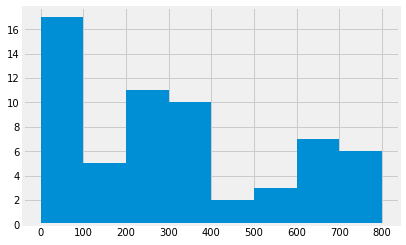

In [16]:
hist_data.hist(bins=binnum)
plt.show()

We can also use the `plt.hist()` funtion to make the same graph:

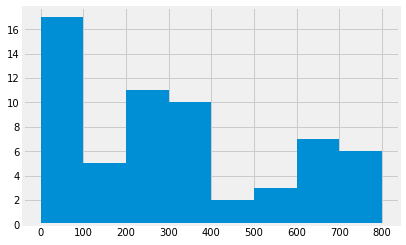

In [17]:
plt.hist(hist_data, bins=binnum)

plt.show()

When determining the bins for a histogram, the bin size controls the number of bins that will show. A smaller bin size will result in more bins, which will show more granularity of the data, but could make it difficult to see patterns in the data. A larger bin size decreases the visible detail of the data, but could also make it hard to discern useful take aways from the data. While exploring data, it's important to try different bins sizes out to see which display provides the most useful information for your analysis needs.

Consider the different bin sizes below:

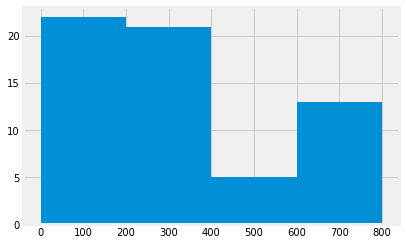

In [18]:
plt.hist(hist_data, bins=range(0, 801, 200))

plt.show()

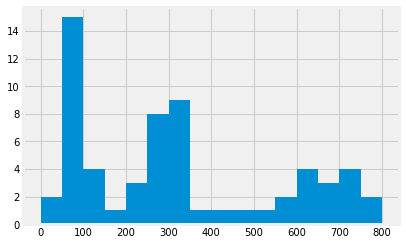

In [19]:
plt.hist(hist_data, bins=range(0, 801, 50))

plt.show()

Both histograms show the same data in different ways. The top histogram has a larger bin size and from it, we can see that it shows most of the values in the data fall within the range of 0-200. The second one has a smaller bin size, and we can see that most of the values of the data fall within the range of 50-100. The latter gives us a more specific range of where most of the data lie, which can be useful down the line.

For now, let's stick with the bin size in the latter graph. Now that we have our plot, let's add additional details to make it more informative:

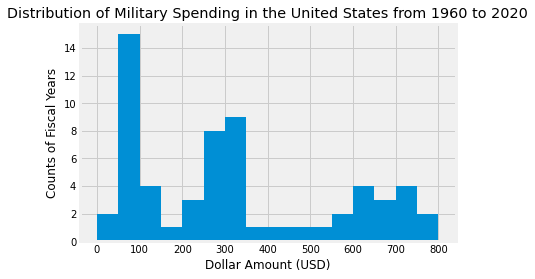

In [20]:
plt.hist(hist_data, bins=range(0, 801, 50))
plt.title("Distribution of Military Spending in the United States from 1960 to 2020")
plt.ylabel('Counts of Fiscal Years')
plt.xlabel("Dollar Amount (USD)")
plt.show()

Awesome! From this plot, we can see that the United States had the highest frequency of fiscal years where \$50 - \$100 billion was spent on the military, while the \$400 - \$550 billion and \$150 - \$200 bins had the lowest frequencies with only 1 year spending those ranges of money.

### Visualizing multiple distributions using histograms

We can also view multiple distributions on one plot on using multiple plots. Let's look at the distributions of the percentage of GDP spent on the military in Canada and the United States from 1960 to 2020.

In [21]:
perc_gdp = military[['CAN-PercentGDP', 'USA-PercentGDP']]
perc_gdp

,CAN-PercentGDP,USA-PercentGDP
Year,,
1960,4.185257,8.993125
1961,4.128312,9.156031
1962,3.999216,9.331673
1963,3.620650,8.831891
1964,3.402063,8.051281
...,...,...
2016,1.164162,3.418942
2017,1.351602,3.313381
2018,1.324681,3.316249


In [22]:
print(perc_gdp.min())
print(perc_gdp.max())

CAN-PercentGDP    0.989925
USA-PercentGDP    3.085677
dtype: float64
CAN-PercentGDP    4.185257
USA-PercentGDP    9.417796
dtype: float64


We see that the minimum values for these two countries is about 0.98%, while the maximum value is about 9.4%. To plot both of these distributions on a single plot, we can create another array called `binnum2` that can include all of the values.


We can then make histograms for each country, specifying the labeling and colors for each. We'll also add a legend to show which color corresponds to which country, as well as proper titles and labeling:

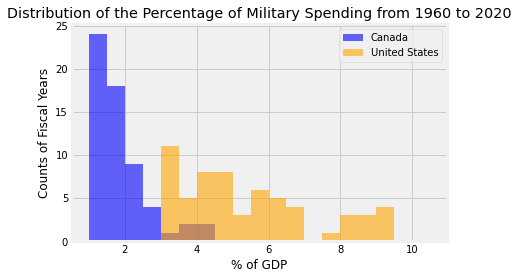

In [23]:
binnum2 = np.arange(1,11, step = 0.5)

# plotting histograms

plt.hist(perc_gdp['CAN-PercentGDP'], label='Canada', alpha=0.6, color = 'blue', bins=binnum2)
plt.hist(perc_gdp['USA-PercentGDP'], label='United States', alpha=0.6, color = 'orange', bins=binnum2)

# labeling
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Distribution of the Percentage of Military Spending from 1960 to 2020')
plt.xlabel('% of GDP')
plt.ylabel('Counts of Fiscal Years')
plt.show()

Additionally, we can use the `plt.subplots()` function to create two separate plots in one figure. By specifying `ax1` and `ax2`, we can use the `hist()` method to create a histogram and set titles and axis labels for each axis.

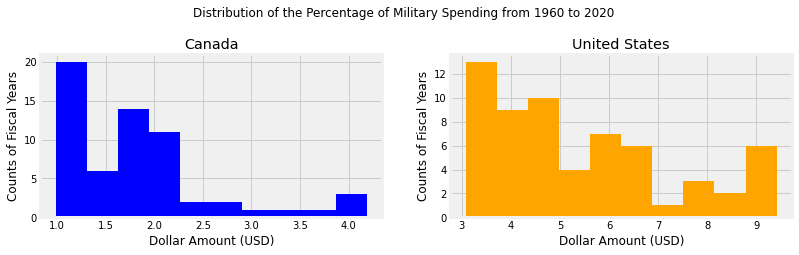

In [24]:
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 3))

plt.suptitle('Distribution of the Percentage of Military Spending from 1960 to 2020', y=1.1)

ax1.hist(perc_gdp['CAN-PercentGDP'], color = 'blue')
ax1.set_title('Canada')
ax1.set_xlabel('Dollar Amount (USD)')
ax1.set_ylabel('Counts of Fiscal Years')

ax2.hist(perc_gdp['USA-PercentGDP'], color = 'orange')
ax2.set_title('United States')
ax2.set_xlabel('Dollar Amount (USD)')
ax2.set_ylabel('Counts of Fiscal Years')


plt.show()

Notice with the above use of the `hist()` method, we did not specify the bins for each axis. Thus, each subplot created 10 bins by default to fit the range of the data.

## Conclusions

In this section, we learned functions and methods to create histograms, scatter plots, and line graphs as a means of visualizing numerical data.

The `plt.scatter()` and `plt.plot()` functions require numerical arrays that serve as `x` and `y` arugments. The `plt.hist()` function requires one numerical array of values for plotting distributions of data.

The `hist()` and `plot()` methods can also be used directly on dataframes to create histograms and line plots, respectively.

We can also create subplots within a figure using `plt.subplots()`.

Lastly, we learned about a number of other functions that can be used to enhance and annotate our plots. Documentation for the functions used in this section, and related functions, are listed below:

- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html">plt.hist( )</a>

- <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html">DataFrame hist method</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html">plt.scatter( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html">plt.plot( )</a>
- <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html">DataFrame plot method</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html">plt.subplots( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html">fig.suptitle( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html">ax.set_title( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html">ax.set_ylim( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html">ax.set_xlim( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html">ax.set_ylabel( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html">ax.set_xlabel( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html">plt.colorbar( )</a>